<a href="https://colab.research.google.com/github/Lorenzo2626/metabase_pics/blob/main/HRC_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HRC Classification project

In [ ]:
!pip install scikit-plot

In [2]:
#@title 

import pandas as pd
import numpy as np
import plotly as ply
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler

import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [3]:
% matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 40)

In [79]:
#K10_url = 'https://raw.githubusercontent.com/Lorenzo2626/ClassificationProject/main/hrc_dataset_10K.csv?token=GHSAT0AAAAAABW2VCOU4KLSHAGJBDA4M62EYWZJYYA'
url = 'https://raw.githubusercontent.com/Lorenzo2626/ClassificationProject/main/hrc_dataset_10K.csv?token=GHSAT0AAAAAABW2VCOVTD2PUX3KKZMAOYASYW2TQSQ'

In [80]:
dataset = pd.read_csv(url)
dataset.head()

,age,nationality,name_email,zip_code,zip_short,occupation,product_type,industry,income_source,income_range,funds_origin,second_nationality,purpose_of_account,email_domain,pep,phone_country_unsupported,tnc_country,birth_country,tnc_like_birth,care_of_address,phone_country,phone_tnc_country,ip_tnc_country,nat_tnc_country,su_kyci_day,device_token_no,address,is_fraudster
0,age_32_38,EST,True,10315,10,NaN,STANDARD,NaN,NaN,NaN,NaN,NaN,NaN,@gmail.com,False,False,EST,NaN,True,False,EST,True,True,True,0-2,NaN,Tallinn,True
1,age_25_31,FRA,True,10000,10,PENSIONER,NaN,NaN,GOVERNMENT_PAYMENTS,NaN,NaN,NaN,PERSONAL_PROJECTS,@yahoo.com,False,True,FRA,FRA,True,False,FRA,True,True,True,0-2,1,Troyes,True
2,age_46_52,ITA,False,80056,80,ITA_EMPLOYEE_PUBLIC_SECTOR,NaN,NaN,SALARY,NaN,NaN,NaN,NaN,@gmail.com,False,False,ITA,ITA,True,False,ITA,True,NaN,True,12+,NaN,Ercolano (NA),True
3,age_>60,BEL,False,1030,10,FREELANCER,STANDARD,EDUCATION_AND_SCIENCE,EMPLOYMENT,NaN,NaN,NaN,NaN,@fastmail.fm,False,False,BEL,GTM,False,False,FRA,False,False,True,0-2,2,Brussels,True
4,age_18_24,ZAF,False,D22X0Y0,D2,NaN,STANDARD,NaN,NaN,NaN,NaN,NaN,NaN,@outlook.ie,False,False,IRL,ZAF,False,False,IRL,True,True,False,0-2,1,Dublin 22,True


In [81]:
data=dataset.copy()

In [ ]:
# for k in data.columns:
#   d = {}
#   int_val = 0
#   for counter, j in enumerate(data[k]):
#       if not j in d.keys():
#           d[j] = int_val
#           int_val = int_val + 1
#       data[k][counter] = d[j]

# data 

In [ ]:
  data.info()

In [83]:
data.describe(include = 'all')

,age,nationality,name_email,zip_code,zip_short,occupation,product_type,industry,income_source,income_range,funds_origin,second_nationality,purpose_of_account,email_domain,pep,phone_country_unsupported,tnc_country,birth_country,tnc_like_birth,care_of_address,phone_country,phone_tnc_country,ip_tnc_country,nat_tnc_country,su_kyci_day,device_token_no,address,is_fraudster
count,20000,20000,20000,19985,19985,9286,11308,6281,6914,181,181,3,1457,20000,20000,20000,20000,12058,20000,20000,18834,18834,15662,20000,20000,7439,19984,20000
unique,7,187,2,9896,413,60,9,62,30,6,9,3,11,1063,1,2,25,157,2,2,95,2,2,2,5,4,8094,2
top,age_25_31,FRA,True,75018,93,FREELANCER,STANDARD,CONSTRUCTION,EMPLOYMENT,BETWEEN_1001_AND_2500_EURO,EUROPE_EU,DZA,SALARY_OR_PENSION,@gmail.com,False,False,FRA,FRA,True,False,FRA,True,True,True,0-2,2,Paris,True
freq,4915,6073,12188,263,972,4640,6763,724,3289,89,96,1,417,11973,20000,13770,7618,3363,15510,19348,7010,17020,13169,13670,14633,3169,893,10000


In [ ]:
#checking unique value per column visualise alt
for i in data.columns:
    print (i,";",len(data[i].unique()),":",data[i].unique())

In [ ]:
for i in data.columns:
    print(data[i].describe())

# Categoricals distribution compared to Y

We only have Categorical Values - these cannot be addressed for correlation with Y in the heatmap (only numerical and booleans) so let's see what's their frequency compared to the Y and eventually drop variables that do not seem to provide skewed distributions.

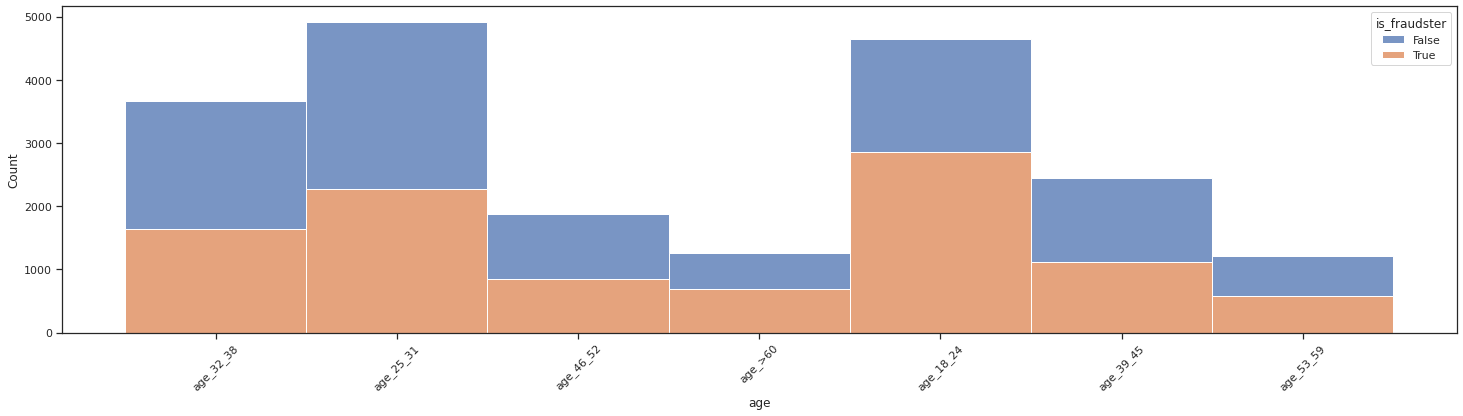

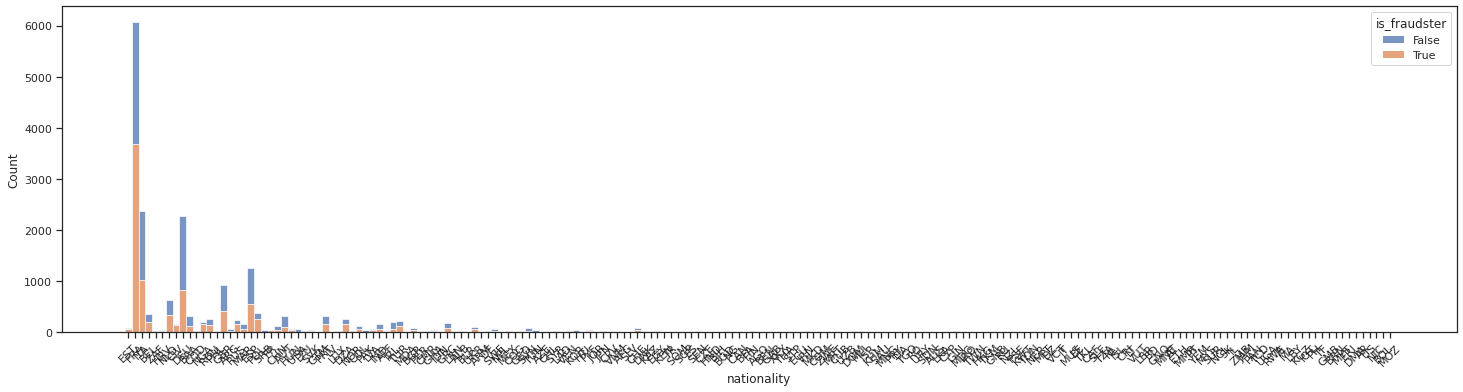

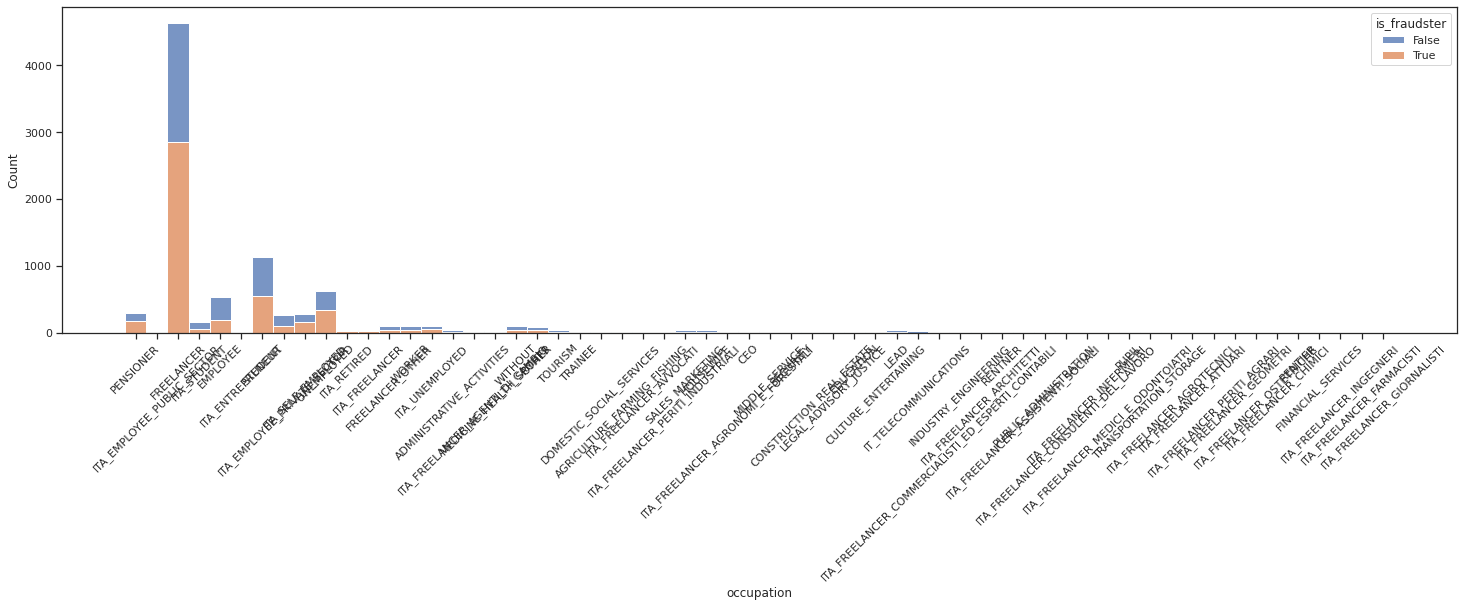

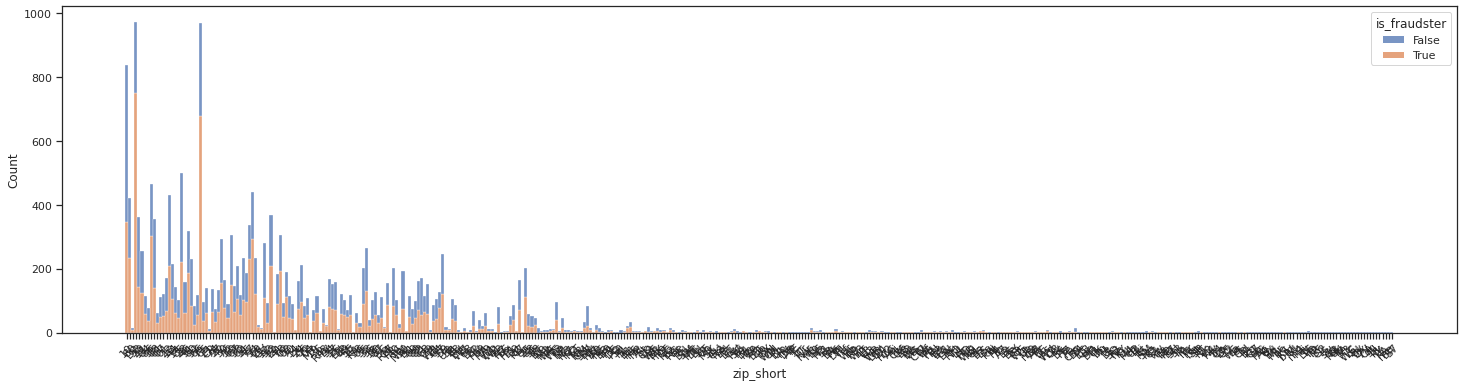

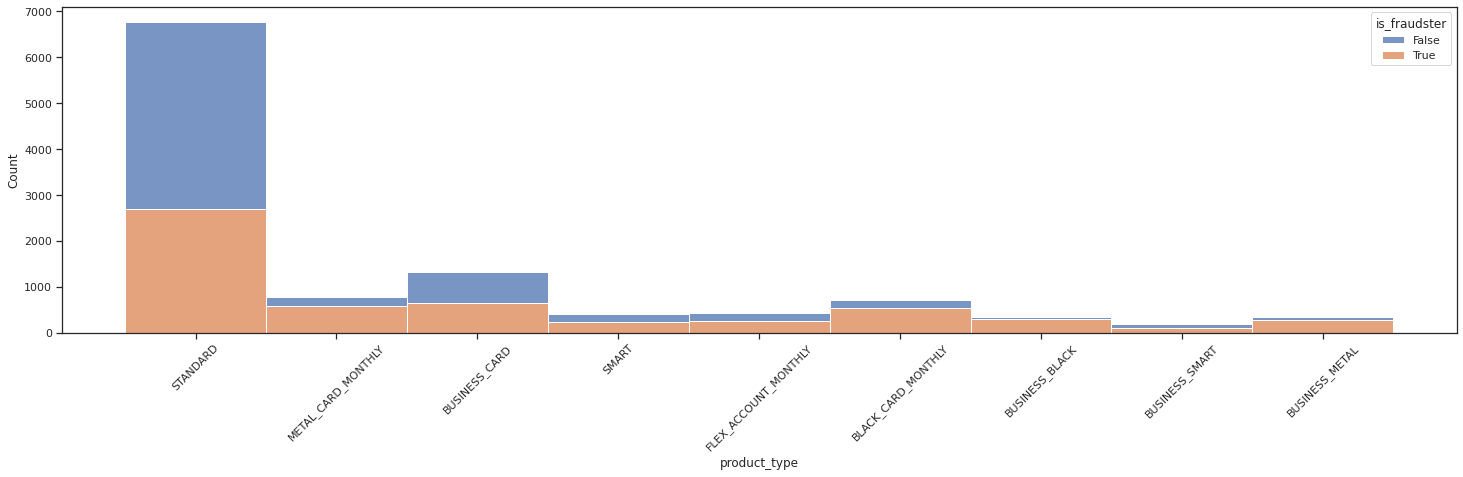

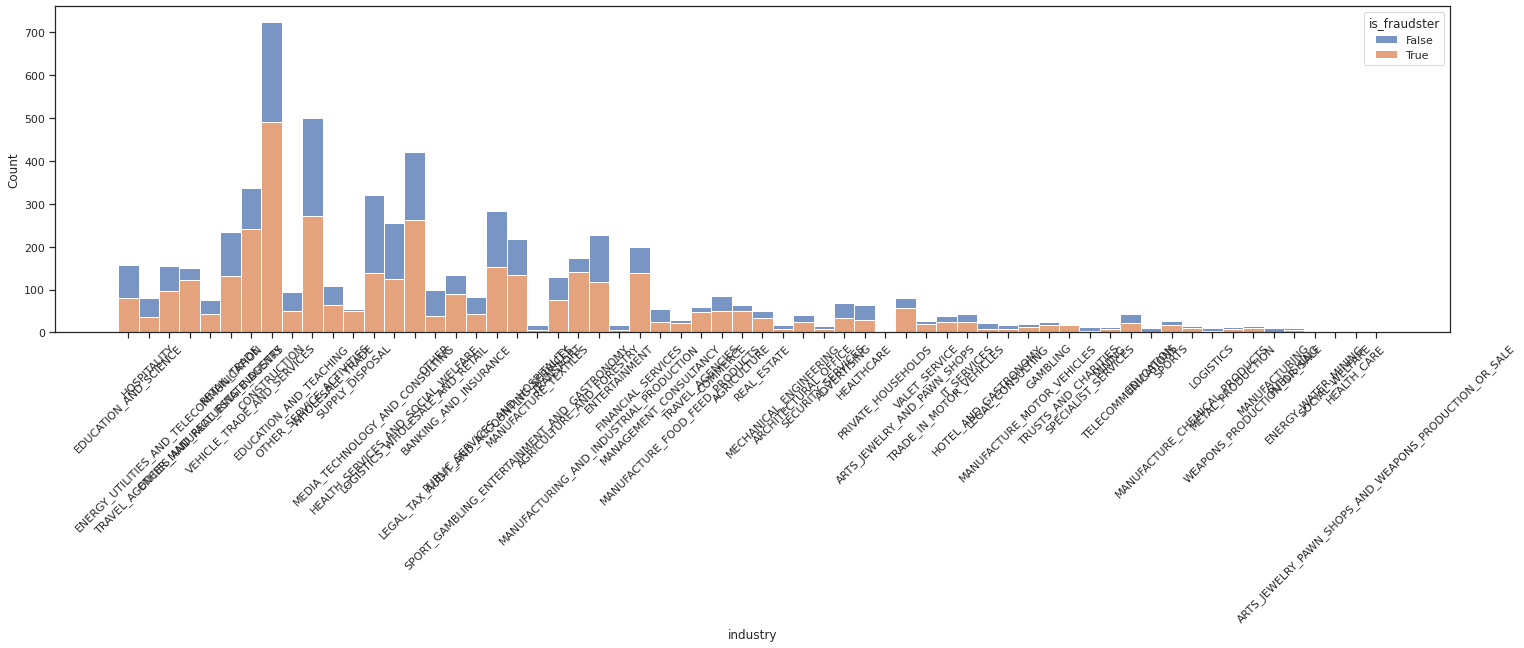

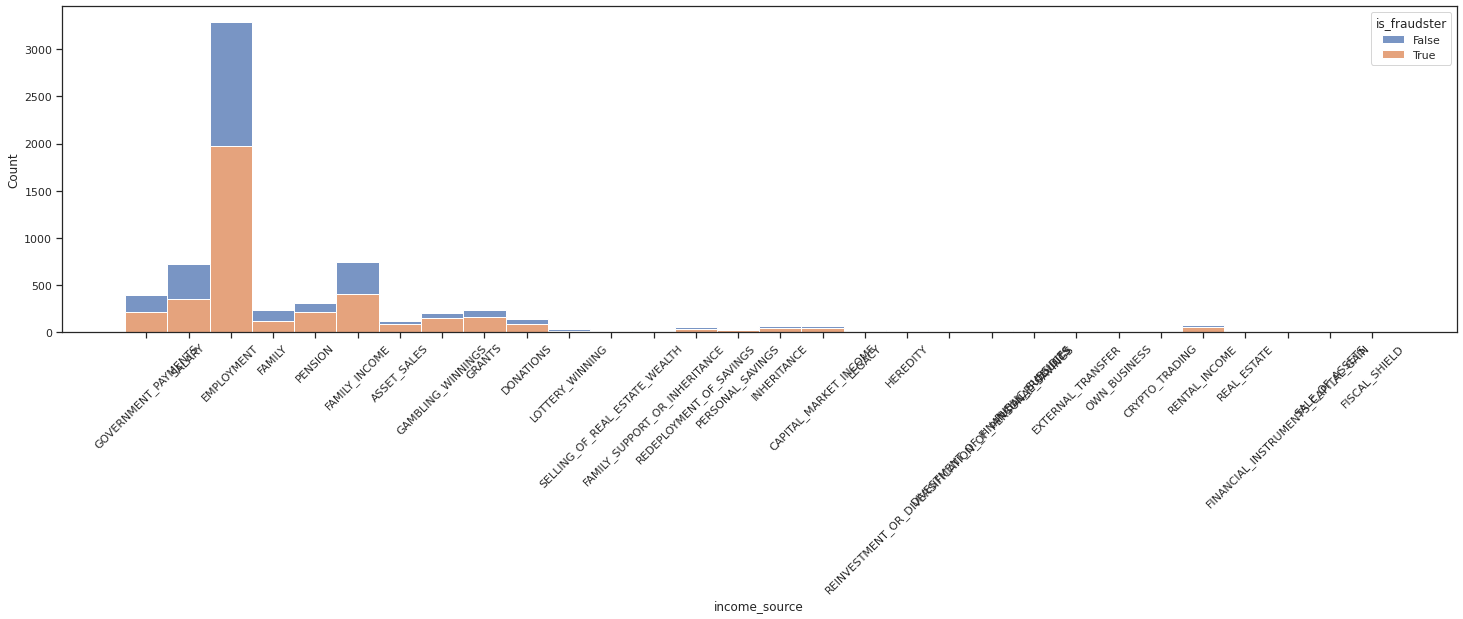

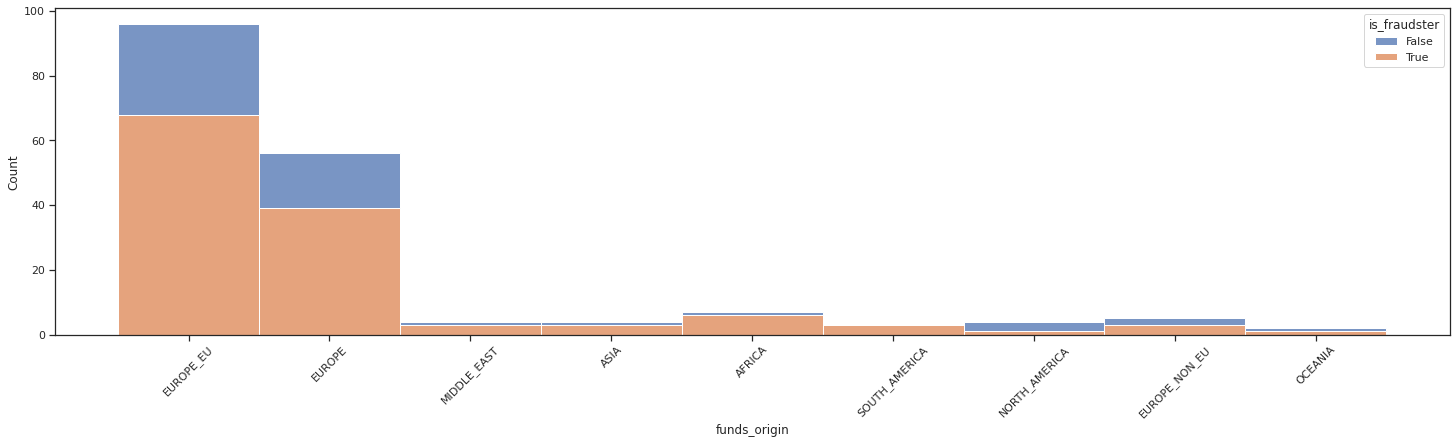

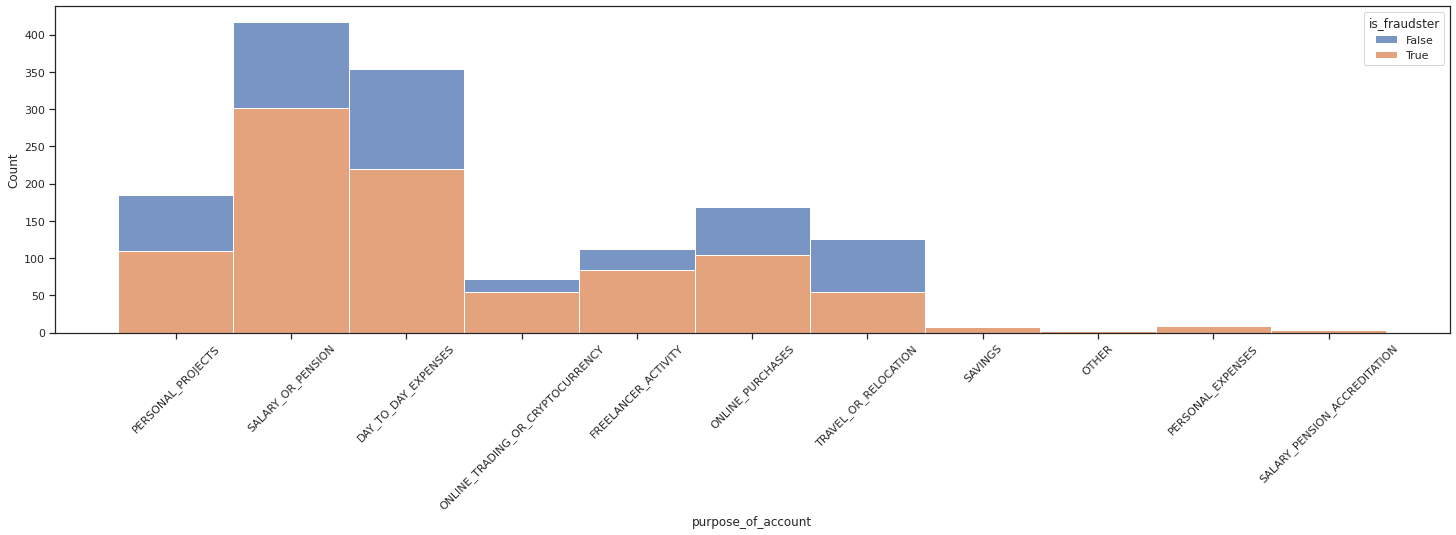

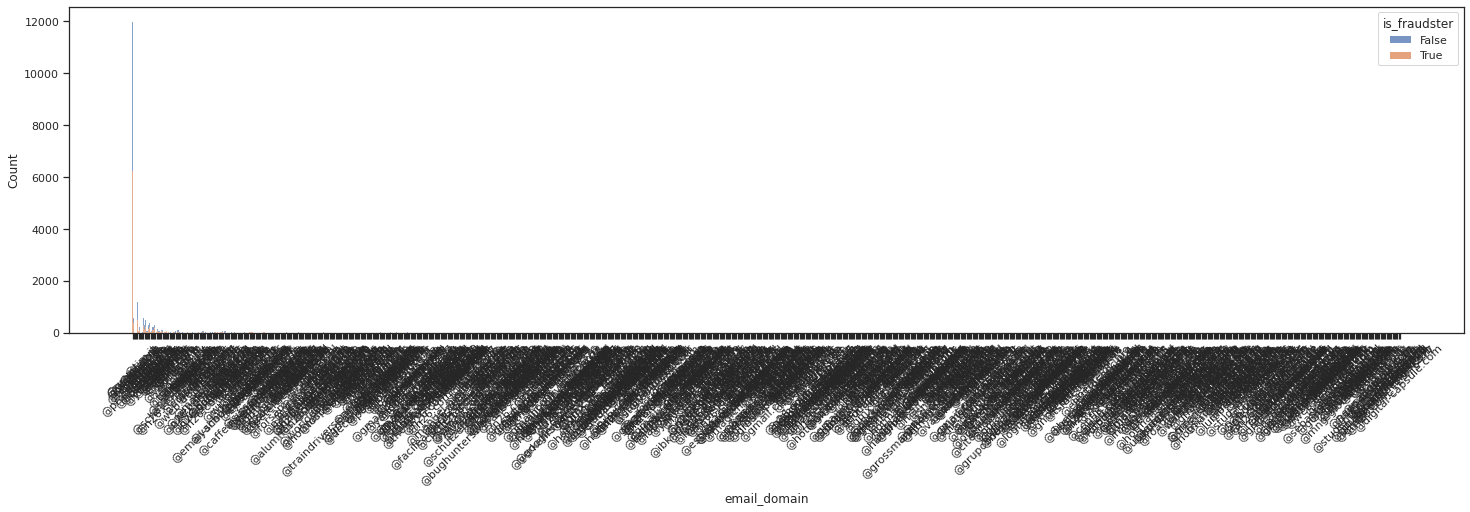

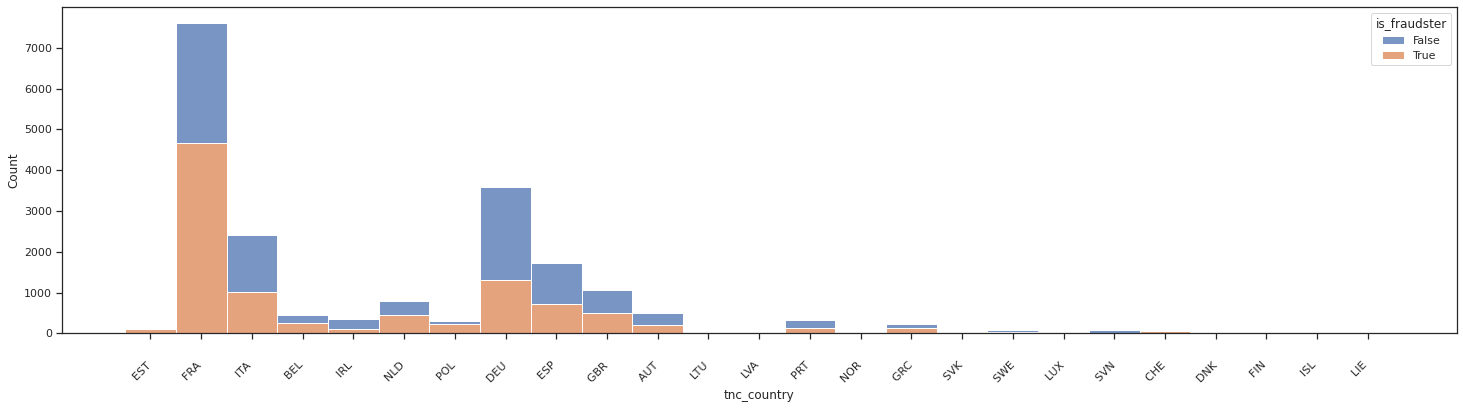

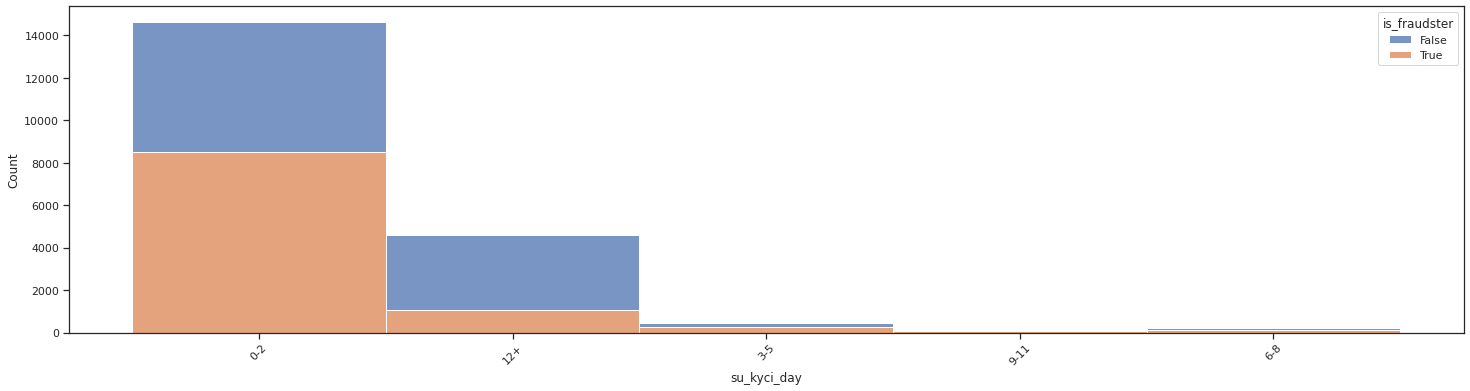

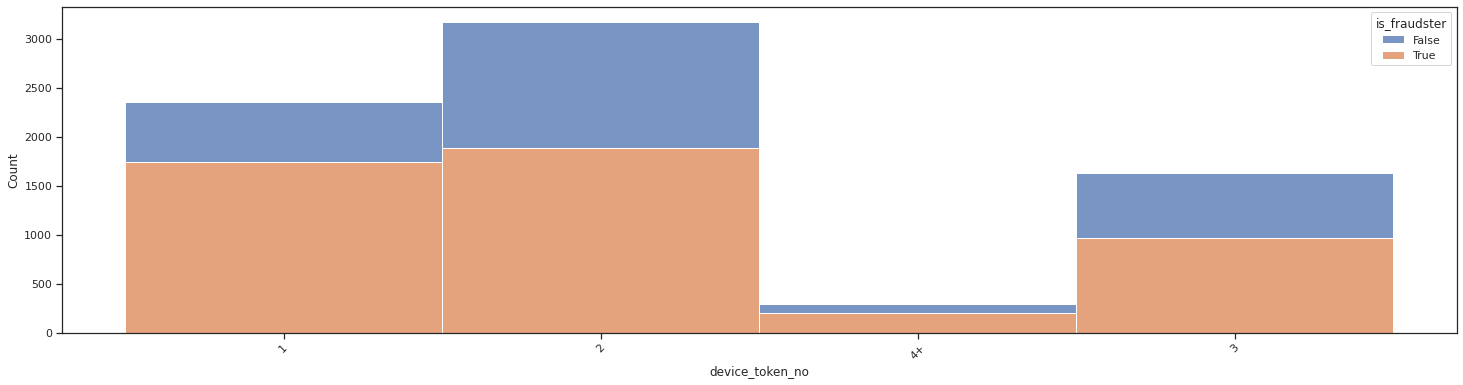

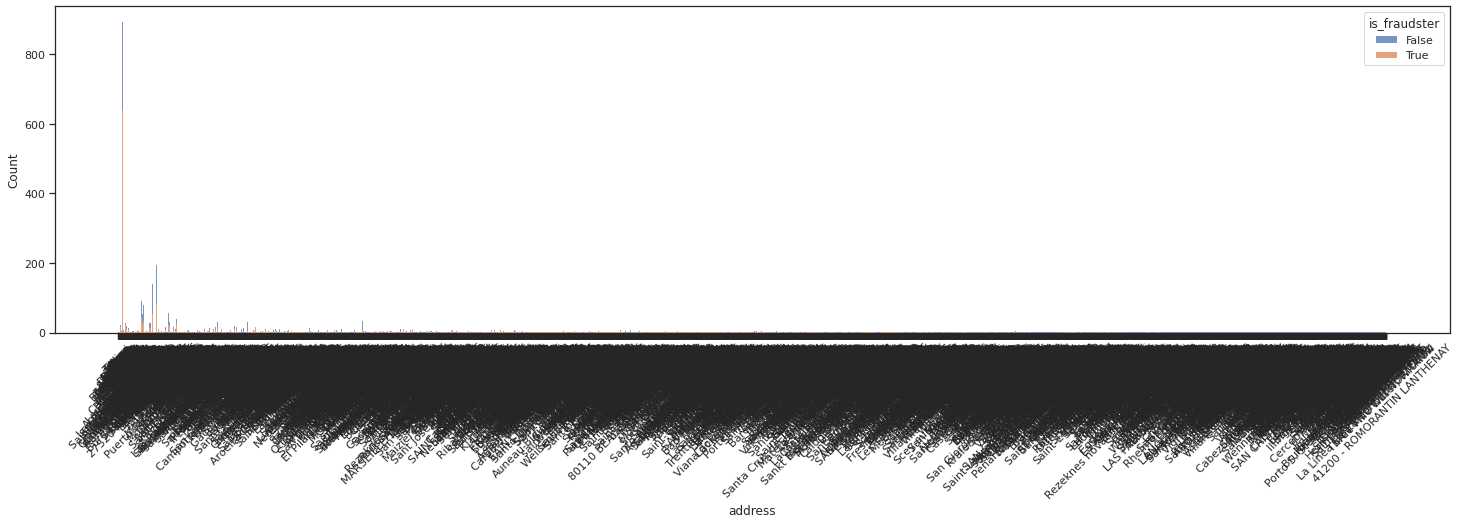

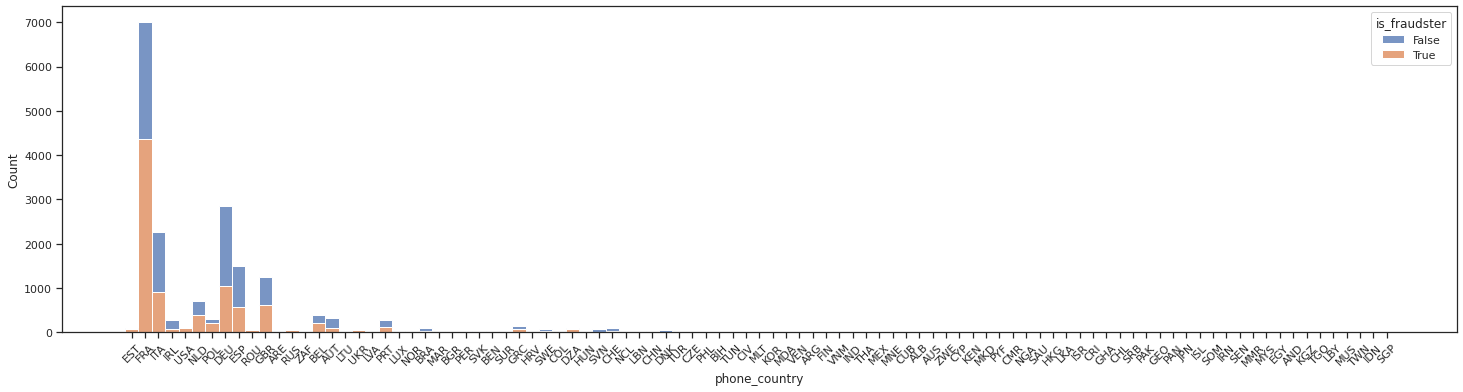

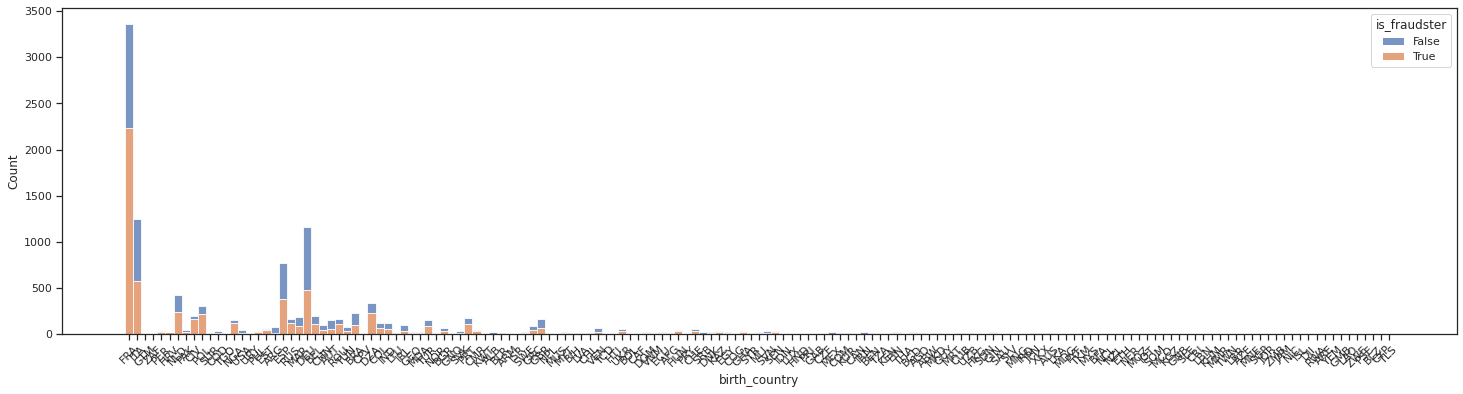

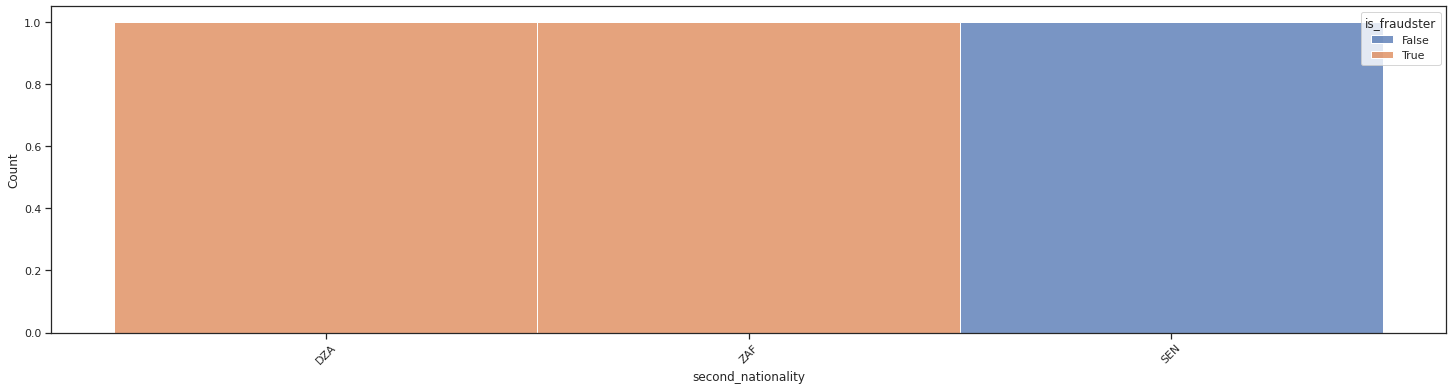

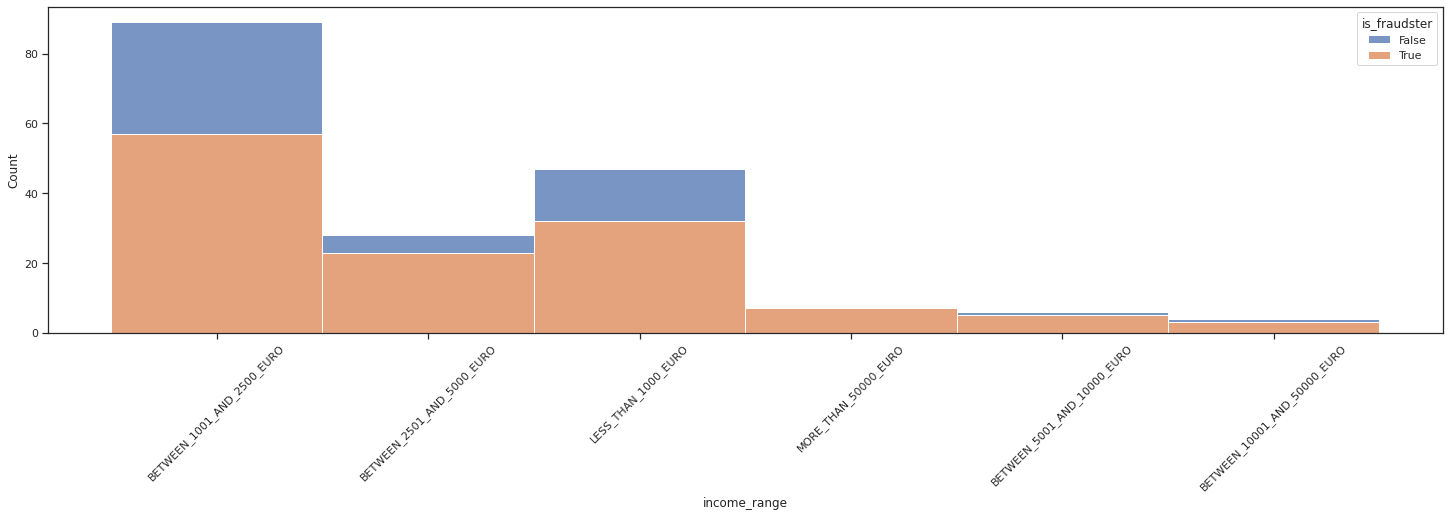

In [42]:
data_cats = data[["age","nationality","occupation","zip_short","product_type","industry","income_source",
                  "funds_origin","purpose_of_account","email_domain","tnc_country","su_kyci_day","device_token_no",
                  "address","phone_country","birth_country","second_nationality","income_range"]]
#data_plot = data.drop(['zip_short','zip_code','pep'], axis = 1)

for i in data_cats.columns:
  f, ax = plt.subplots(figsize=(25, 6))
  sns.histplot(
      x=data_cats[i], hue=data["is_fraudster"],
      multiple="stack"  
  )

  locs, labels = plt.xticks()
  plt.setp(labels, rotation=45)

  plt.show()


according to their raw numbers and distribution compared to Y I decided to exclude the fields below from the dataset as it seems they will not help the model further.

In [86]:
data = data.drop(['zip_short','zip_code','pep','email_domain','birth_country','second_nationality','phone_country','address','industry','occupation'], axis = 1)

In [12]:
#all variables are categoricals - keep just in case

#splitting numericals and categorical variables

# cat_columns = []
# num_columns = []

# for i in data.columns:
#     if len(data[i].unique()) > 10:
#         num_columns.append(i)
#     else:
#         cat_columns.append(i)

# #assigne to DFs
# num = data[num_columns]
# cat = data[cat_columns]
#---
#data.groupby(['age'])['if_fraudster'].sum().plot(kind="bar",figsize=(20,10))

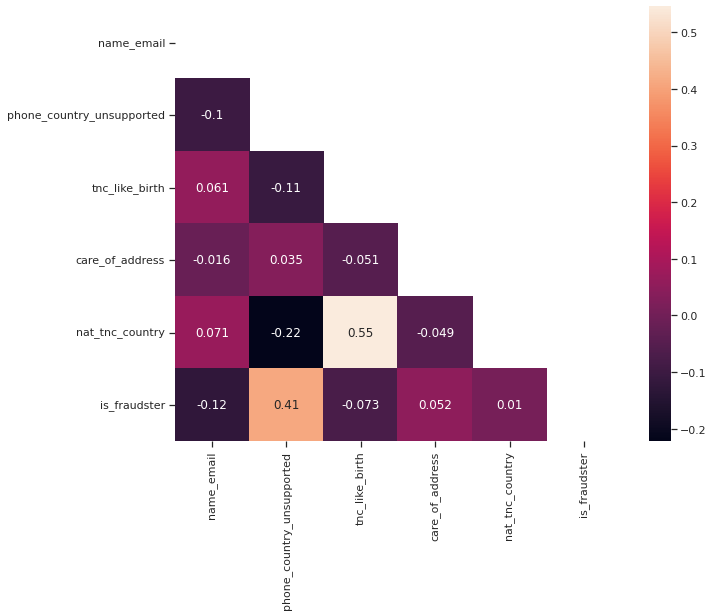

In [87]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

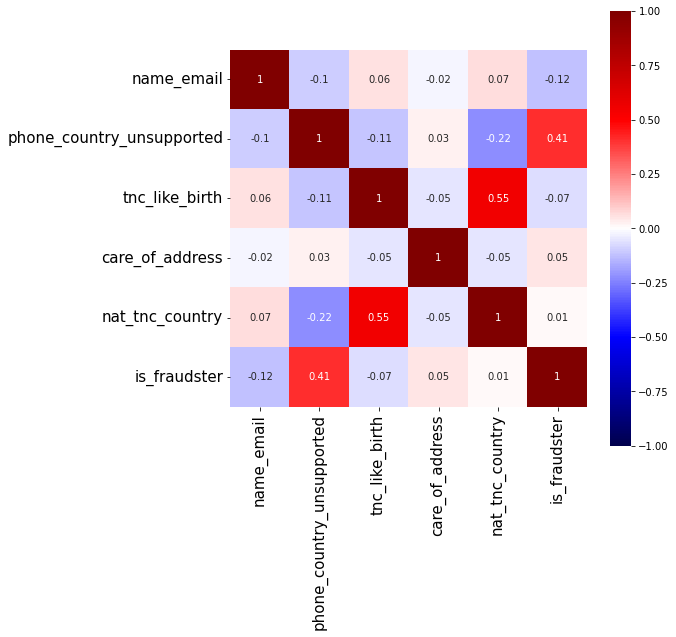

In [59]:
#categorical fields correlations
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(data.corr().round(2),vmin=-1, vmax=1, center=0, annot = True, annot_kws = {'size':10},square=True, cmap='seismic') 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 15)
plt.show()

Correlations only between Y variable and phone_country_unsupported

Multicollinearity shows generally values above 0.50. Slight multicollinearity is observed between two X variables: tnc_like_birth and nat_tnc_country.




Encoding Categorical variables

In [88]:
y = data["is_fraudster"]
data = data.drop(["is_fraudster"], axis = 1)

In [89]:
#encode categorical columns using one hot encoder
data_cols= data.columns
one_hot_data=pd.get_dummies(data[data_cols], drop_first=True)
data_ohe=pd.concat([data, one_hot_data], axis=1)
data_ohe.drop(columns=data_cols, inplace=True)
X=data_ohe #no numericals, assign all cats encoded to X

In [47]:
X.head()

,age_age_25_31,age_age_32_38,age_age_39_45,age_age_46_52,age_age_53_59,age_age_>60,nationality_AGO,nationality_ALB,nationality_AR,nationality_ARG,nationality_ARM,nationality_AT,nationality_ATF,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BD,nationality_BEL,nationality_BEN,nationality_BFA,nationality_BGD,nationality_BGR,nationality_BIH,nationality_BLR,nationality_BOL,nationality_BRA,nationality_BRN,nationality_CAF,nationality_CAN,nationality_CHE,nationality_CHL,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COG,nationality_COL,nationality_COM,nationality_CPV,nationality_CRI,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DE,nationality_DEU,nationality_DMA,nationality_DNK,nationality_DOM,nationality_DZ,nationality_DZA,nationality_ECU,nationality_EE,nationality_EGY,nationality_ERI,nationality_ES,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIN,nationality_FR,nationality_FRA,nationality_GAB,nationality_GBR,nationality_GEO,nationality_GHA,nationality_GIN,nationality_GMB,nationality_GNB,nationality_GNQ,nationality_GRC,nationality_GTM,nationality_HKG,nationality_HND,nationality_HRV,nationality_HTI,nationality_HUN,nationality_IDN,nationality_IE,nationality_IL,nationality_IND,nationality_IOT,nationality_IRL,nationality_IRN,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_IT,nationality_ITA,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KHM,nationality_KOR,nationality_KWT,nationality_LAO,nationality_LBN,nationality_LBR,nationality_LBY,nationality_LKA,nationality_LT,nationality_LTU,nationality_LUX,nationality_LV,nationality_LVA,nationality_MA,nationality_MAR,nationality_MDA,nationality_MDG,nationality_MEX,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MMR,nationality_MNE,nationality_MNG,nationality_MOZ,nationality_MRT,nationality_MUS,nationality_MYS,nationality_MYT,nationality_NCL,nationality_NER,nationality_NG,nationality_NGA,nationality_NIC,nationality_NL,nationality_NLD,nationality_NOR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PAN,nationality_PER,nationality_PH,nationality_PHL,nationality_POL,nationality_PRT,nationality_PRY,nationality_PSE,nationality_PT,nationality_PYF,nationality_RO,nationality_ROU,nationality_RU,nationality_RUS,nationality_RWA,nationality_SAU,nationality_SDN,nationality_SEN,nationality_SGP,nationality_SK,nationality_SLE,nationality_SLV,nationality_SOM,nationality_SRB,nationality_STP,nationality_SUR,nationality_SVK,nationality_SVN,nationality_SWE,nationality_SYR,nationality_TCD,nationality_TF,nationality_TGO,nationality_THA,nationality_TKL,nationality_TKM,nationality_TON,nationality_TR,nationality_TUN,nationality_TUR,nationality_TWN,nationality_TZA,nationality_UA,nationality_UGA,nationality_UKR,nationality_URY,nationality_US,nationality_USA,nationality_UZB,nationality_VCT,nationality_VEN,nationality_VNM,nationality_VUT,nationality_XKX,nationality_YEM,nationality_ZAF,nationality_ZMB,nationality_ZWE,product_type_BUSINESS_BLACK,product_type_BUSINESS_CARD,product_type_BUSINESS_METAL,product_type_BUSINESS_SMART,product_type_FLEX_ACCOUNT_MONTHLY,product_type_METAL_CARD_MONTHLY,product_type_SMART,product_type_STANDARD,income_source_CAPITAL_MARKET_INCOME,income_source_CRYPTO_TRADING,income_source_DIVESTMENT_OF_FINANCIAL_PRODUCTS,income_source_DONATIONS,income_source_EMPLOYMENT,income_source_EXTERNAL_TRANSFER,income_source_FAMILY,income_source_FAMILY_INCOME,income_source_FAMILY_SUPPORT_OR_INHERITANCE,income_source_FINANCIAL_INSTRUMENTS_CAPITAL_GAIN,income_source_FISCAL_SHIELD,income_source_GAMBLING_WINNINGS,income_source_GOVERNMENT_PAYMENTS,income_source_GRANTS,income_source_HEREDITY,income_source_INHERITANCE,income_source_LEGACY,income_source_LOTTERY_WINNING,income_source_OWN_BUSINESS,income_source_PENSION,income_source_PERSONAL_SAVINGS,income_source_PUBLIC_SUBSIDIES,income_source_REAL_ESTATE,income_source_REDEPLOYMENT_OF_SAVINGS,income_source_REINVESTM

In [48]:
def oversampler_choice_train(x):
    global X_train, y_train
    if x=="ros":
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_resample(X_train, y_train)
        print("Random Oversampler:\n", y_train.value_counts())
    elif x=="smote":
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X_train, y_train)
        print("SMOTE:\n", y_train.value_counts())
    elif x == "ada":
        ada = ADASYN(random_state=42)
        X_train, y_train = ada.fit_resample(X_train, y_train)
        print("ADASYN:\n", y_train.value_counts())
    else:
        print ("Input should be ros, smote or ada")

In [90]:
#function to run chosen model

def model_predictions(x, X_train, X_test, y_train, y_test):
    #global X_train, X_test, y_train, y_test, model, predictions
    if x == "logistic":
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
        model.fit(X_train, y_train)
        print("Logistic:")
        predictions =  model.predict(X_test)
    elif x == "knn":
        model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
    elif x=="decision_tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        print("Decision Tree:")
        predictions = model.predict(X_test)
    elif x=="random_forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        print ("Random Forest:")
        predictions = model.predict(X_test)
    else:
        print ("Input should be logistic, knn, decision_tree or random_forest")   
    
    #calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
    print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
    print("Kappa: ", cohen_kappa_score(y_test, predictions))   
    print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
    print("F1 score: ", f1_score(y_test, predictions))  
    #generate confusion matrices with raw and normalised values
    print ("Confusion Matrix - raw:")
    plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
    plt.show() 
    print ("Confusion Matrix - normalised row-wise:")
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
    plt.show() 
    return [model, predictions]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [92]:
print("y_test:\n",y_test.value_counts())
print("y_train:\n", y_train.value_counts())

y_test:
 True     3078
False    2922
Name: is_fraudster, dtype: int64
y_train:
 False    7078
True     6922
Name: is_fraudster, dtype: int64


In [93]:
#choose smote, ada (ADASYN) or ros (Random Oversampler)
oversampler_choice_train("smote")

SMOTE:
 True     7078
False    7078
Name: is_fraudster, dtype: int64


Random Forest:
The accuracy of the model on test set is:  0.712
Kappa:  0.4236403515793856
ROC-AUC score:  0.7118311978897734
F1 score:  0.7190243902439025
Confusion Matrix - raw:


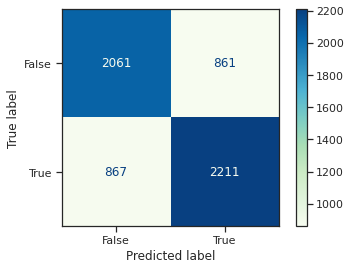

Confusion Matrix - normalised row-wise:


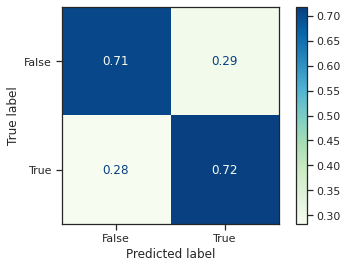

In [94]:
#Logistic Regression: "logistic", K Nearest Neighbours: "knn", Decision Tree: "decision_tree", Random Forest: "random_forest"
model_run = model_predictions("random_forest", X_train, X_test, y_train, y_test)

# ROC curve
The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR)

<function matplotlib.pyplot.show>

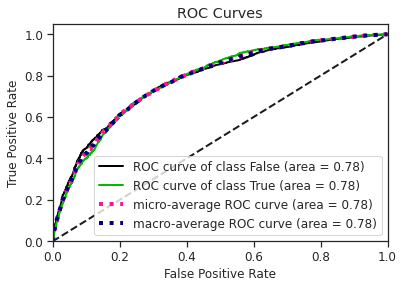

In [95]:
model = model_run[0]
y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true,y_probas)
plt.show

The precision-recall curve below shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Recall is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found.

Logistic: f1=0.687 auc=0.732


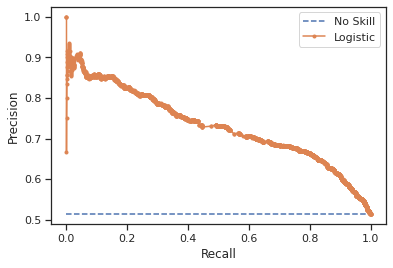

In [96]:
from matplotlib import pyplot
# fit a model
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Feature Importance

The positive scores indicate a feature that predicts "Yes" and the negative scores indicate a feature that predicts "No"

Logistic regression for feature importance

In [101]:
attr = []
for i in X.columns:
  attr.append(i)
attr_df = pd.DataFrame(attr)

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
score = []
for i,v in enumerate(importance):
	score.append('Feature: %0d, Score: %.5f' % (i,v))
score_df = pd.DataFrame(score)

# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)

In [99]:
result = pd.concat([attr_df, score_df], axis=1)
result

,0,0
0,age_age_25_31,"Feature: 0, Score: -0.50587"
1,age_age_32_38,"Feature: 1, Score: -0.62029"
2,age_age_39_45,"Feature: 2, Score: -0.57839"
3,age_age_46_52,"Feature: 3, Score: -0.48924"
4,age_age_53_59,"Feature: 4, Score: -0.39680"
...,...,...
280,su_kyci_day_6-8,"Feature: 280, Score: -0.04559"
281,su_kyci_day_9-11,"Feature: 281, Score: -0.23230"
282,device_token_no_2,"Feature: 282, Score: -0.12204"
283,device_token_no_3,"Feature: 283, Score: -0.19327"


Random forest for feature importance

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

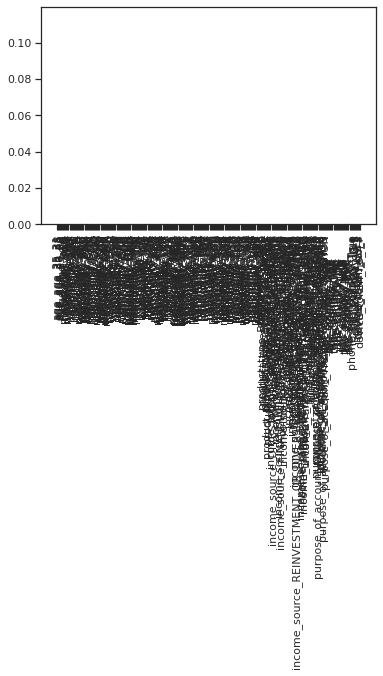

In [100]:
from sklearn.datasets import make_classification
from matplotlib import pyplot

model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance

   
# plot feature importance
pyplot.bar([x for x in X_train], importance)
plt.xticks(rotation='vertical')